In [1]:
#all imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
customer_data=pd.read_csv('Mall_Customers.csv')
customer_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


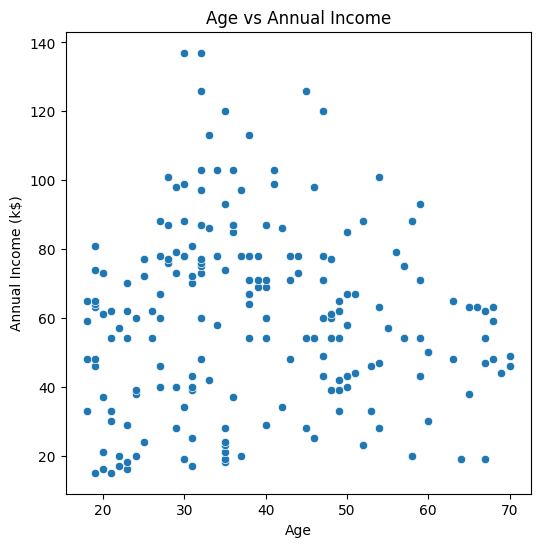

In [3]:
#vizualizing the data
#Age vs Annual Income
plt.figure(figsize=(6,6))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=customer_data)
plt.title('Age vs Annual Income')
plt.show()


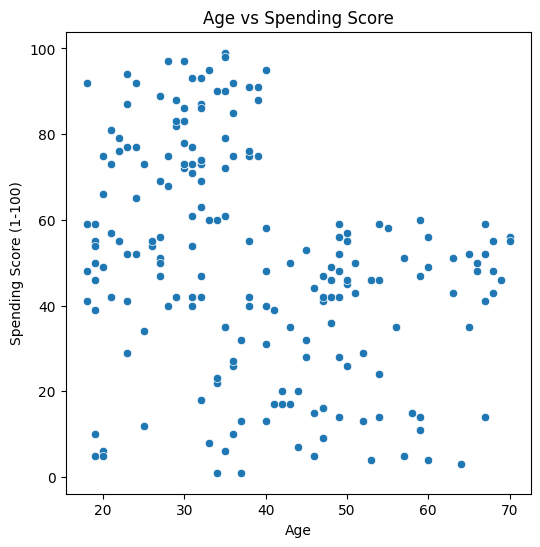

In [4]:
#Age vs Spending Score
plt.figure(figsize=(6,6))
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=customer_data)
plt.title('Age vs Spending Score')
plt.show()

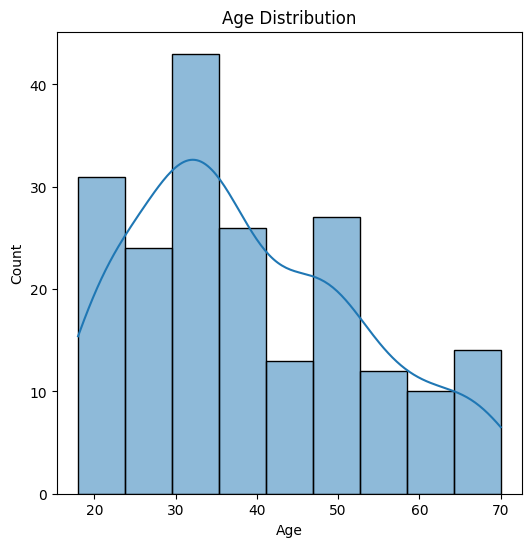

In [5]:
#Age distribution
plt.figure(figsize=(6,6))
sns.histplot(customer_data['Age'],kde=True)
plt.title('Age Distribution')
plt.show()

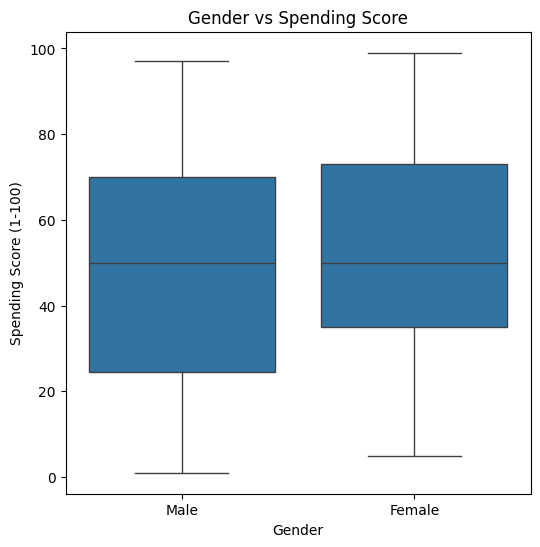

In [7]:
#Gender vs Spending Score
plt.figure(figsize=(6,6))
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=customer_data)
plt.title('Gender vs Spending Score')
plt.show()

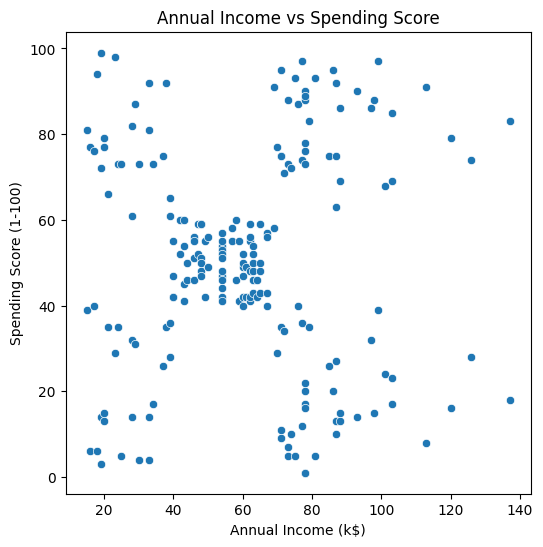

In [8]:
#Income vs Spending Score
plt.figure(figsize=(6,6))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=customer_data)
plt.title('Annual Income vs Spending Score')
plt.show()

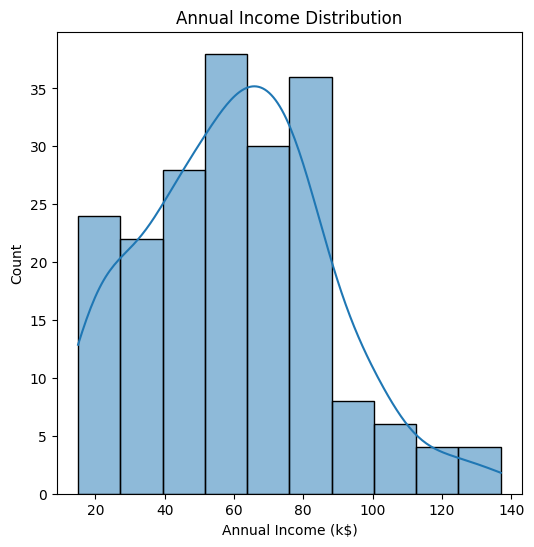

In [9]:
#Anual Income distribution
plt.figure(figsize=(6,6))
sns.histplot(customer_data['Annual Income (k$)'],kde=True)
plt.title('Annual Income Distribution')
plt.show()

c:\Users\adelz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adelz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adelz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adelz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

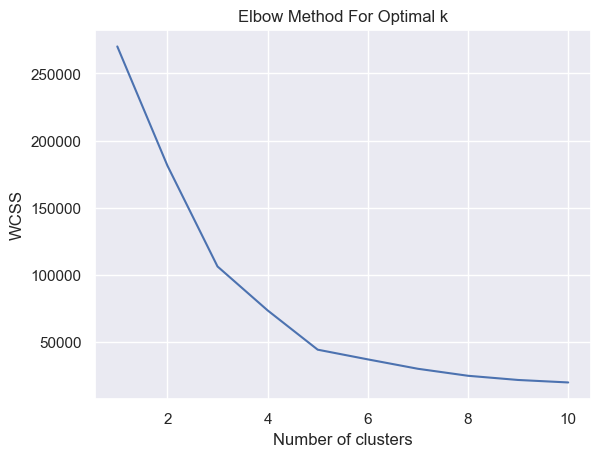

In [11]:
#wcss value for different number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(customer_data[['Annual Income (k$)','Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


c:\Users\adelz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


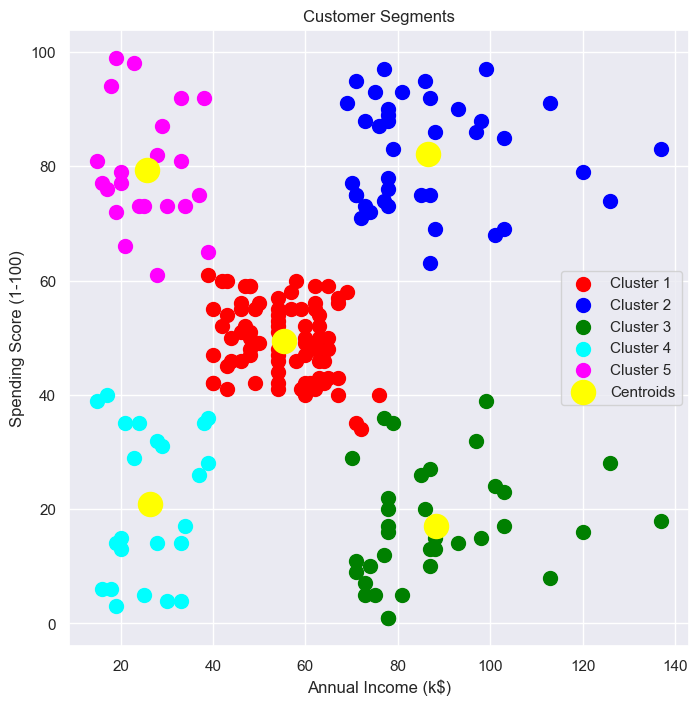

In [12]:
#KMeans Clustering
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(customer_data[['Annual Income (k$)','Spending Score (1-100)']])
plt.figure(figsize=(8,8))
plt.scatter(customer_data.iloc[y_kmeans==0,3],customer_data.iloc[y_kmeans==0,4],s=100,c='red',label='Cluster 1')
plt.scatter(customer_data.iloc[y_kmeans==1,3],customer_data.iloc[y_kmeans==1,4],s=100,c='blue',label='Cluster 2')
plt.scatter(customer_data.iloc[y_kmeans==2,3],customer_data.iloc[y_kmeans   ==2,4],s=100,c='green',label='Cluster 3')
plt.scatter(customer_data.iloc[y_kmeans==3,3],customer_data.iloc[y_kmeans==3,4],s=100,c='cyan',label='Cluster 4')
plt.scatter(customer_data.iloc[y_kmeans==4,3],customer_data.iloc[y_kmeans   ==4,4],s=100,c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Customer Segments')      
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [ ]:
#depending on the clusters we can target different customer segments with different marketing strategies.
#Cluster 1: High income, high spending - Target with premium products and exclusive offers.
#Cluster 2: High income, low spending - Target with personalized recommendations and loyalty programs.
#Cluster 3: Low income, high spending - Target with discounts and budget-friendly options.
#Cluster 4: Low income, low spending - Target with value packs and essential products.
#Cluster 5: Medium income, medium spending - Target with a mix of promotions and quality products.
#This segmentation helps in tailoring marketing efforts to different customer needs and preferences, ultimately improving customer satisfaction and business performance.
